In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [29]:
%matplotlib inline

import seaborn as sns
sns.set()

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [32]:
df = pd.read_csv('all_data.csv',sep=',').drop(['Unnamed: 0'], 1)

In [33]:
df.head(10)

,PLAYER_ID,full_name,SEASON_ID,SEASON_EXP,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,POSITION,GP,GS,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,AST,STL,BLK,TOV,PF,PTS,is_active
0,76001,Alaa Abdelnaby,1992-93,5,1610612749,MIL,25.0,Forward,12,0.0,159.0,26,56,0.0,1.0,12,16,12.0,25.0,10,6.0,4.0,13.0,24,64,False
1,76001,Alaa Abdelnaby,1992-93,5,1610612749,MIL,25.0,Forward,12,0.0,159.0,26,56,0.0,1.0,12,16,12.0,25.0,10,6.0,4.0,13.0,24,64,False
2,76001,Alaa Abdelnaby,1992-93,5,1610612738,BOS,25.0,Forward,63,52.0,1152.0,219,417,0.0,0.0,76,100,114.0,186.0,17,19.0,22.0,84.0,165,514,False
3,76001,Alaa Abdelnaby,1992-93,5,1610612738,BOS,25.0,Forward,63,52.0,1152.0,219,417,0.0,0.0,76,100,114.0,186.0,17,19.0,22.0,84.0,165,514,False
4,76001,Alaa Abdelnaby,1992-93,5,0,TOT,25.0,Forward,75,52.0,1311.0,245,473,0.0,1.0,88,116,126.0,211.0,27,25.0,26.0,97.0,189,578,False
5,76001,Alaa Abdelnaby,1992-93,5,0,TOT,25.0,Forward,75,52.0,1311.0,245,473,0.0,1.0,88,116,126.0,211.0,27,25.0,26.0,97.0,189,578,False
6,76001,Alaa Abdelnaby,1993-94,5,1610612738,BOS,26.0,Forward,13,0.0,159.0,24,55,0.0,0.0,16,25,12.0,34.0,3,2.0,3.0,17.0,20,64,False
7,76001,Alaa Abdelnaby,1993-94,5,1610612738,BOS,26.0,Forward,13,0.0,159.0,24,55,0.0,0.0,16,25,12.0,34.0,3,2.0,3.0,17.0,20,64,False
8,76001,Alaa Abdelnaby,1994-95,5,1610612758,SAC,27.0,Forward,51,0.0,476.0,117,220,0.0,2.0,20,35,34.0,72.0,13,15.0,12.0,40.0,102,254,False
9,76001,Alaa Abdelnaby,1994-95,5,1610612758,SAC,27.0,Forward,51,0.0,476.0,117,220,0.0,2.0,20,35,34.0,72.0,13,15.0,12.0,40.0,102,254,False


In [34]:
df.shape

(17295, 26)

In [35]:
X_num = df.select_dtypes(include=['int64','float64'])
X_cat = df.select_dtypes(include=['object'])

In [36]:
X_num.describe()

,PLAYER_ID,SEASON_EXP,TEAM_ID,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,AST,STL,BLK,TOV,PF,PTS
count,1.729500e+04,17295.000000,1.729500e+04,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000
mean,2.664676e+05,9.495577,1.458911e+09,27.239144,46.234056,21.927493,1073.878635,166.281758,366.482394,31.098121,87.551315,81.160046,107.652154,50.847702,137.322405,99.265106,34.504076,21.713212,62.743452,95.155825,444.821683
std,5.229251e+05,4.969384,4.704600e+08,4.262309,26.298162,27.358420,885.810000,166.192843,356.163188,45.479760,120.525441,98.539341,126.099016,59.090136,136.786352,126.029967,33.964726,32.160327,60.955209,73.807128,450.754799
min,2.000000e+00,0.000000,0.000000e+00,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.830000e+02,5.000000,1.610613e+09,24.000000,22.500000,0.000000,270.000000,31.000000,74.000000,0.000000,2.000000,12.000000,18.000000,9.000000,30.000000,14.000000,7.000000,3.000000,14.000000,29.000000,81.000000
50%,2.590000e+03,10.000000,1.610613e+09,27.000000,50.000000,7.000000,882.000000,114.000000,257.000000,8.000000,28.000000,45.000000,63.000000,29.000000,99.000000,54.000000,25.000000,10.000000,45.000000,85.000000,299.000000
75%,2.023965e+05,13.000000,1.610613e+09,30.000000,71.000000,40.000000,1747.000000,255.000000,565.000000,48.000000,136.000000,113.000000,153.000000,70.000000,201.000000,134.000000,52.000000,26.000000,94.000000,149.000000,678.000000
max,1.630698e+06,23.000000,1.610613e+09,94.000000,85.000000,83.000000,3533.000000,992.000000,2173.000000,402.000000,1028.000000,756.000000,972.000000,453.000000,914.000000,1031.000000,232.000000,342.000000,464.000000,371.000000,2832.000000


In [37]:
X_num = X_num.loc[:, ~X_num.columns.isin(['PLAYER_ID', 'TEAM_ID'])]

In [38]:
X_num.describe()

,SEASON_EXP,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,AST,STL,BLK,TOV,PF,PTS
count,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000
mean,9.495577,27.239144,46.234056,21.927493,1073.878635,166.281758,366.482394,31.098121,87.551315,81.160046,107.652154,50.847702,137.322405,99.265106,34.504076,21.713212,62.743452,95.155825,444.821683
std,4.969384,4.262309,26.298162,27.358420,885.810000,166.192843,356.163188,45.479760,120.525441,98.539341,126.099016,59.090136,136.786352,126.029967,33.964726,32.160327,60.955209,73.807128,450.754799
min,0.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,24.000000,22.500000,0.000000,270.000000,31.000000,74.000000,0.000000,2.000000,12.000000,18.000000,9.000000,30.000000,14.000000,7.000000,3.000000,14.000000,29.000000,81.000000
50%,10.000000,27.000000,50.000000,7.000000,882.000000,114.000000,257.000000,8.000000,28.000000,45.000000,63.000000,29.000000,99.000000,54.000000,25.000000,10.000000,45.000000,85.000000,299.000000
75%,13.000000,30.000000,71.000000,40.000000,1747.000000,255.000000,565.000000,48.000000,136.000000,113.000000,153.000000,70.000000,201.000000,134.000000,52.000000,26.000000,94.000000,149.000000,678.000000
max,23.000000,94.000000,85.000000,83.000000,3533.000000,992.000000,2173.000000,402.000000,1028.000000,756.000000,972.000000,453.000000,914.000000,1031.000000,232.000000,342.000000,464.000000,371.000000,2832.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efbc70aabe0>,
      dtype=object)

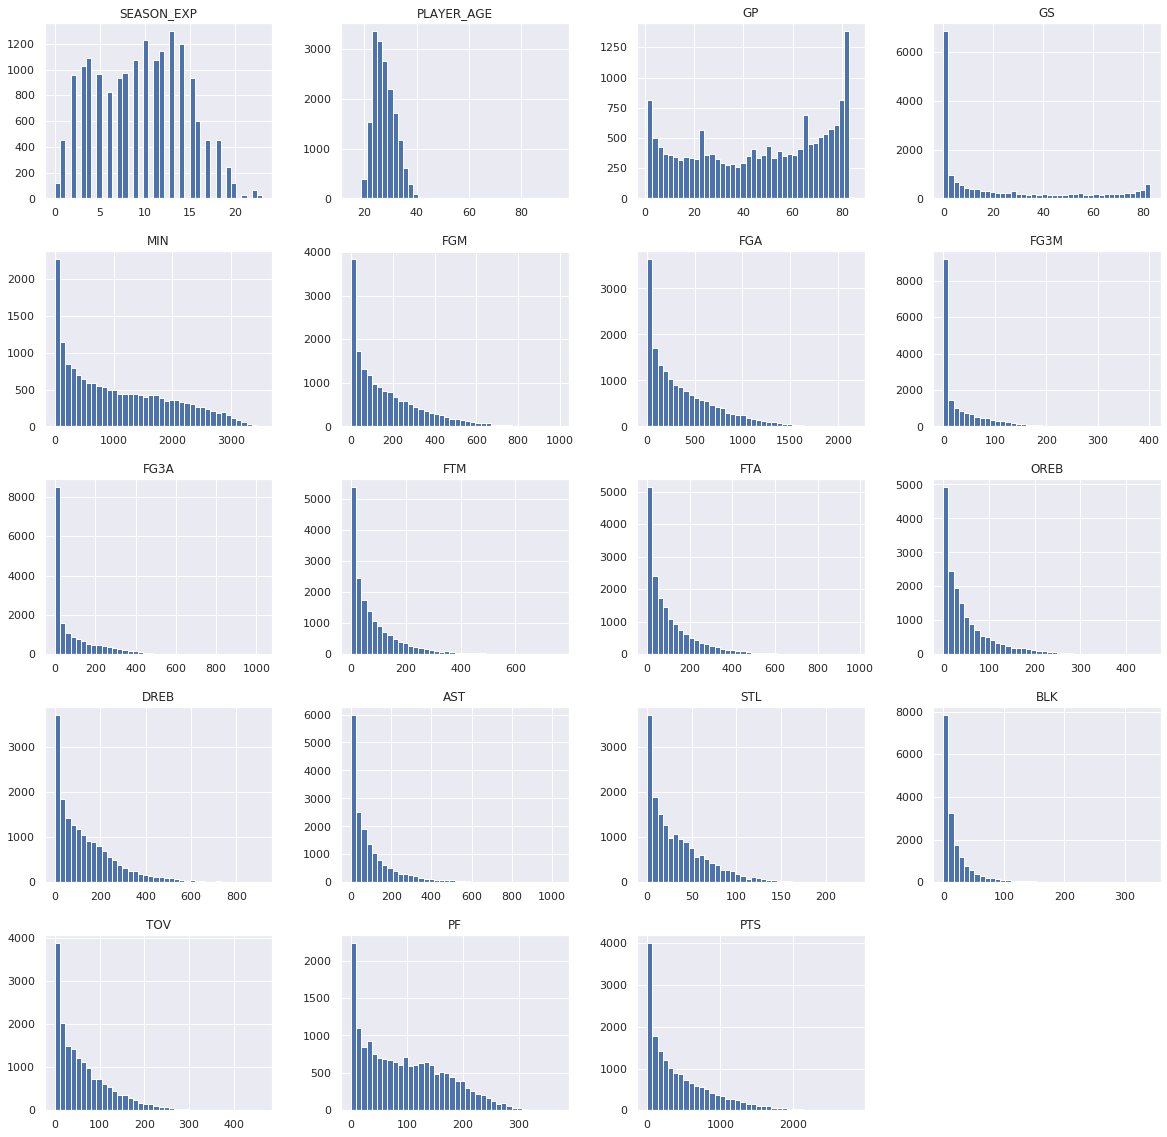

In [39]:
X_num.hist(figsize=(20, 20), bins=40)

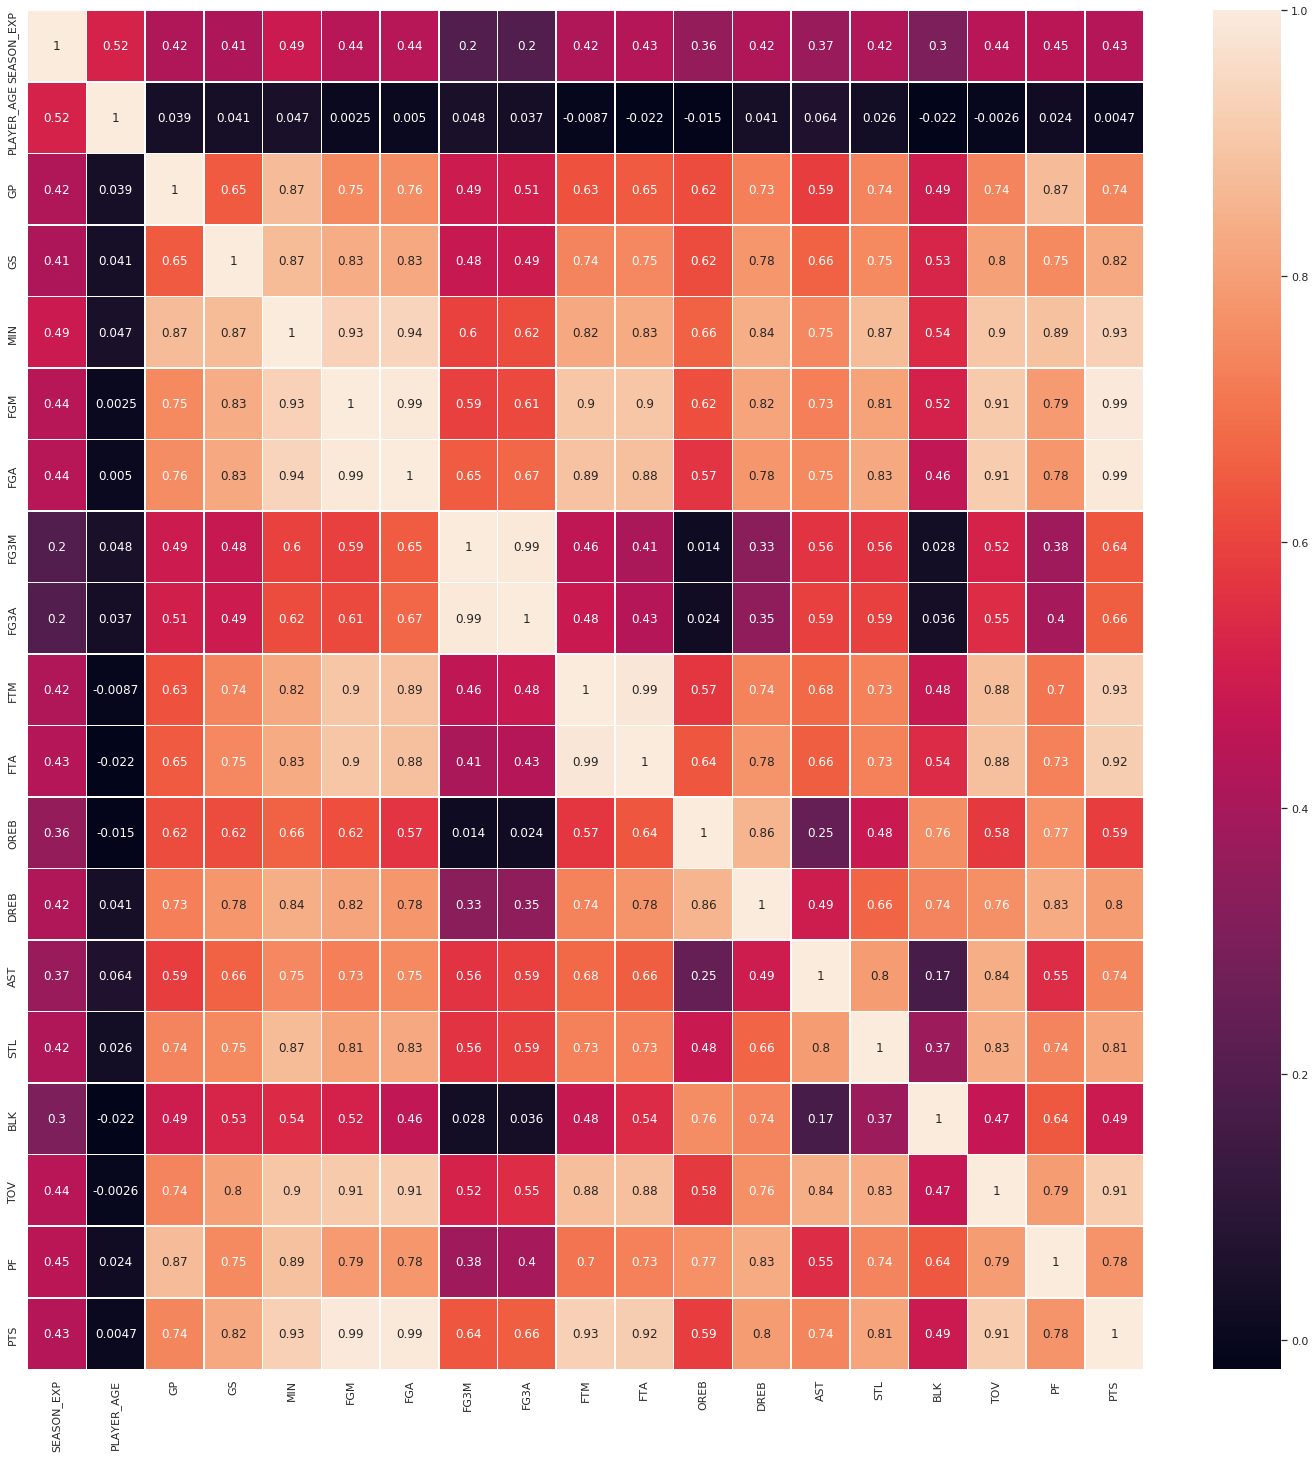

In [40]:
corr_matrix = X_num.corr()
# corr_matrix = X.loc[:,columns].corr()
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax)

In [41]:
df_copy = df.copy()

In [42]:
df_copy['FG_SCORE'] = ((df_copy['FGA']+df_copy['FGM'])**2)/(3*(df_copy['FGA'])**2) -1/3

In [43]:
df_copy['FG3_SCORE'] = ((df_copy['FG3A']+df_copy['FG3M'])**2)/(3*(df_copy['FG3A'])**2) -1/3

In [44]:
df_copy['FT_SCORE'] = ((df_copy['FTA']+df_copy['FTM'])**2)/(3*(df_copy['FTA'])**2) -1/3

In [45]:
X1_num = (df_copy.select_dtypes(include=['int64','float64'])).drop(['PLAYER_ID', 'TEAM_ID','FGA','FGM','FG3A','FG3M','FTA','FTM'], 1)
X1_cat = df_copy.select_dtypes(include=['object'])

In [46]:
X1_num.describe()

,SEASON_EXP,PLAYER_AGE,GP,GS,MIN,OREB,DREB,AST,STL,BLK,TOV,PF,PTS,FG_SCORE,FG3_SCORE,FT_SCORE
count,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17197.000000,14594.000000,16442.000000
mean,9.495577,27.239144,46.234056,21.927493,1073.878635,50.847702,137.322405,99.265106,34.504076,21.713212,62.743452,95.155825,444.821683,0.355118,0.222428,0.665400
std,4.969384,4.262309,26.298162,27.358420,885.810000,59.090136,136.786352,126.029967,33.964726,32.160327,60.955209,73.807128,450.754799,0.097797,0.142550,0.164248
min,0.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,24.000000,22.500000,0.000000,270.000000,9.000000,30.000000,14.000000,7.000000,3.000000,14.000000,29.000000,81.000000,0.315140,0.149938,0.583418
50%,10.000000,27.000000,50.000000,7.000000,882.000000,29.000000,99.000000,54.000000,25.000000,10.000000,45.000000,85.000000,299.000000,0.354780,0.250577,0.687500
75%,13.000000,30.000000,71.000000,40.000000,1747.000000,70.000000,201.000000,134.000000,52.000000,26.000000,94.000000,149.000000,678.000000,0.397559,0.296197,0.769893
max,23.000000,94.000000,85.000000,83.000000,3533.000000,453.000000,914.000000,1031.000000,232.000000,342.000000,464.000000,371.000000,2832.000000,1.000000,1.000000,1.000000


In [47]:
df_copy.describe()

,PLAYER_ID,SEASON_EXP,TEAM_ID,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,AST,STL,BLK,TOV,PF,PTS,FG_SCORE,FG3_SCORE,FT_SCORE
count,1.729500e+04,17295.000000,1.729500e+04,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17295.000000,17197.000000,14594.000000,16442.000000
mean,2.664676e+05,9.495577,1.458911e+09,27.239144,46.234056,21.927493,1073.878635,166.281758,366.482394,31.098121,87.551315,81.160046,107.652154,50.847702,137.322405,99.265106,34.504076,21.713212,62.743452,95.155825,444.821683,0.355118,0.222428,0.665400
std,5.229251e+05,4.969384,4.704600e+08,4.262309,26.298162,27.358420,885.810000,166.192843,356.163188,45.479760,120.525441,98.539341,126.099016,59.090136,136.786352,126.029967,33.964726,32.160327,60.955209,73.807128,450.754799,0.097797,0.142550,0.164248
min,2.000000e+00,0.000000,0.000000e+00,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.830000e+02,5.000000,1.610613e+09,24.000000,22.500000,0.000000,270.000000,31.000000,74.000000,0.000000,2.000000,12.000000,18.000000,9.000000,30.000000,14.000000,7.000000,3.000000,14.000000,29.000000,81.000000,0.315140,0.149938,0.583418
50%,2.590000e+03,10.000000,1.610613e+09,27.000000,50.000000,7.000000,882.000000,114.000000,257.000000,8.000000,28.000000,45.000000,63.000000,29.000000,99.000000,54.000000,25.000000,10.000000,45.000000,85.000000,299.000000,0.354780,0.250577,0.687500
75%,2.023965e+05,13.000000,1.610613e+09,30.000000,71.000000,40.000000,1747.000000,255.000000,565.000000,48.000000,136.000000,113.000000,153.000000,70.000000,201.000000,134.000000,52.000000,26.000000,94.000000,149.000000,678.000000,0.397559,0.296197,0.769893
max,1.630698e+06,23.000000,1.610613e+09,94.000000,85.000000,83.000000,3533.000000,992.000000,2173.000000,402.000000,1028.000000,756.000000,972.000000,453.000000,914.000000,1031.000000,232.000000,342.000000,464.000000,371.000000,2832.000000,1.000000,1.000000,1.000000


In [ ]:
df_copy[df_copy['FG3_SCORE']]